# Traveling Salesman Problem.

Consider Mr. Q. One of his life long dream is to travel to every American capital city(each State has one) **exactly once each**. 

He maps out the location each of the capital city (given in ``xy``). He may start at any city. His goal is to save travel cost. Lets assume travel cost from one city to the next is directly proportional to how far the two cities are $\sqrt{\Delta x^2 + \Delta y^2}$

Please find a route which help him save some his money while traveling through each city exacly once each.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
raw_data = """6734 1453
2233   10
5530 1424
 401  841
3082 1644
7608 4458
7573 3716
7265 1268
6898 1885
1112 2049
5468 2606
5989 2873
4706 2674
4612 2035
6347 2683
6107  669
7611 5184
7462 3590
7732 4723
5900 3561
4483 3369
6101 1110
5199 2182
1633 2809
4307 2322
 675 1006
7555 4819
7541 3981
3177  756
7352 4506
7545 2801
3245 3305
6426 3173
4608 1198
  23 2216
7248 3779
7762 4595
7392 2244
3484 2829
6271 2135
4985  140
1916 1569
7280 4899
7509 3239
  10 2676
6807 2993
5185 3258
3023 1942""".strip()

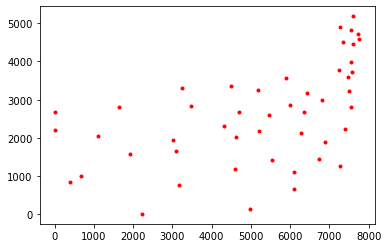

In [3]:
xy = np.array([[float(x) for x in line.split(' ') if x != ''] for line in raw_data.split('\n')])

plt.plot(xy[:,0], xy[:,1], '.r')

In [4]:
def initial_state():
    return np.array([[float(x) for x in line.split(' ') if x != ''] for line in raw_data.split('\n')])

def acceptance_probability(cost, new_cost, temperature):
    if new_cost < cost:
        return 1
    else:
        p = np.exp(- (new_cost - cost) / temperature)
        return p

def temperature(fraction):
    #Example of temperature decreasing as the process goes on
    return max(0.01, min(1, 1 - fraction))
    
def perturb(state): #swap 2 locations
    new_state = state.copy()
    idx1 = np.random.randint(len(new_state))
    temp = new_state[idx1].copy()
    idx2 = np.random.randint(len(new_state))
    new_state[idx1] = new_state[idx2]
    new_state[idx2] = temp
    return new_state

def distance(loc1,loc2):
    return np.sqrt((loc2[0]-loc1[0])**2 + (loc2[1]-loc1[1])**2)

def evaluate(seq):
    score = 0
    for loc_idx in range(len(seq)-1):
        score += distance(seq[loc_idx], seq[loc_idx+1])
    return score

def find_answer_sa(n=3):
    state = initial_state()
    best_score = evaluate(state)
    for i in range(n):
        fraction = i / float(n)
        T = temperature(fraction)
        new_state = perturb(state)
        new_score = evaluate(new_state)
        if (new_score < best_score):
            state = new_state
            best_score = new_score
        else: 
            if acceptance_probability(best_score, new_score, T) > np.random.random():
                state = new_state
        if i%1000 == 0:
            print(i, best_score)
    return state, best_score

def find_answer_hc(n=3):
    state = initial_state()
    best_score = evaluate(state)
    for i in range(n):
        new_state = perturb(state)
        new_score = evaluate(new_state)
        if (new_score < best_score):
            state = new_state
            best_score = new_score
        if i%1000 == 0:
            print(i, best_score)
    return state, best_score

In [5]:
best_seq_hc, score_hc = find_answer_hc(50000)
print()
best_seq_sa, score_sa = find_answer_sa(50000)

0 153787.16703624904
1000 60798.32123888491
2000 56097.05705554957
3000 49943.95873490506
4000 48298.59588413963
5000 47546.40068245991
6000 47215.47072324094
7000 46997.088666858355
8000 46778.12734789802
9000 46428.752261098845
10000 46428.752261098845
11000 46428.752261098845
12000 46428.752261098845
13000 46373.28209207741
14000 46373.28209207741
15000 46373.28209207741
16000 46373.28209207741
17000 46373.28209207741
18000 46373.28209207741
19000 46373.28209207741
20000 46373.28209207741
21000 46373.28209207741
22000 46373.28209207741
23000 46373.28209207741
24000 46373.28209207741
25000 46373.28209207741
26000 46373.28209207741
27000 46373.28209207741
28000 46373.28209207741
29000 46373.28209207741
30000 46373.28209207741
31000 46373.28209207741
32000 46373.28209207741
33000 46373.28209207741
34000 46373.28209207741
35000 46373.28209207741
36000 46373.28209207741
37000 46373.28209207741
38000 46373.28209207741
39000 46373.28209207741
40000 46373.28209207741
41000 46373.28209207741

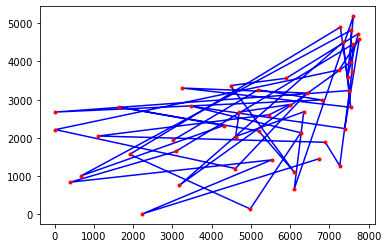

In [6]:
plt.plot(xy[:,0], xy[:,1], 'b')
plt.plot(xy[:,0], xy[:,1], '.r')

[[7265. 1268.]
 [6107.  669.]
 [6101. 1110.]
 [6271. 2135.]
 [6347. 2683.]
 [6807. 2993.]
 [7545. 2801.]
 [7392. 2244.]
 [6898. 1885.]
 [6734. 1453.]
 [5530. 1424.]
 [4985.  140.]
 [3177.  756.]
 [4608. 1198.]
 [6426. 3173.]
 [7248. 3779.]
 [7541. 3981.]
 [7762. 4595.]
 [7608. 4458.]
 [5900. 3561.]
 [4706. 2674.]
 [2233.   10.]
 [ 401.  841.]
 [ 675. 1006.]
 [3484. 2829.]
 [5185. 3258.]
 [7280. 4899.]
 [7611. 5184.]
 [7555. 4819.]
 [7732. 4723.]
 [7352. 4506.]
 [4483. 3369.]
 [3245. 3305.]
 [1633. 2809.]
 [  10. 2676.]
 [  23. 2216.]
 [1112. 2049.]
 [1916. 1569.]
 [3082. 1644.]
 [3023. 1942.]
 [4307. 2322.]
 [4612. 2035.]
 [5199. 2182.]
 [5468. 2606.]
 [5989. 2873.]
 [7509. 3239.]
 [7462. 3590.]
 [7573. 3716.]]


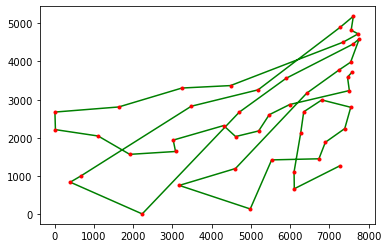

In [7]:
plt.plot(best_seq_sa[:,0], best_seq_sa[:,1], 'g')
plt.plot(xy[:,0], xy[:,1], '.r')
print(best_seq_sa)

[[6107.  669.]
 [6101. 1110.]
 [5530. 1424.]
 [4608. 1198.]
 [4612. 2035.]
 [3082. 1644.]
 [3023. 1942.]
 [1916. 1569.]
 [1112. 2049.]
 [  23. 2216.]
 [  10. 2676.]
 [3484. 2829.]
 [4307. 2322.]
 [5199. 2182.]
 [6734. 1453.]
 [6898. 1885.]
 [7392. 2244.]
 [7265. 1268.]
 [4985.  140.]
 [3177.  756.]
 [2233.   10.]
 [ 401.  841.]
 [ 675. 1006.]
 [1633. 2809.]
 [3245. 3305.]
 [7280. 4899.]
 [7611. 5184.]
 [7555. 4819.]
 [7732. 4723.]
 [7762. 4595.]
 [7608. 4458.]
 [7352. 4506.]
 [6426. 3173.]
 [5468. 2606.]
 [4706. 2674.]
 [4483. 3369.]
 [5185. 3258.]
 [5900. 3561.]
 [7248. 3779.]
 [7541. 3981.]
 [7573. 3716.]
 [7462. 3590.]
 [7509. 3239.]
 [7545. 2801.]
 [6807. 2993.]
 [6347. 2683.]
 [5989. 2873.]
 [6271. 2135.]]


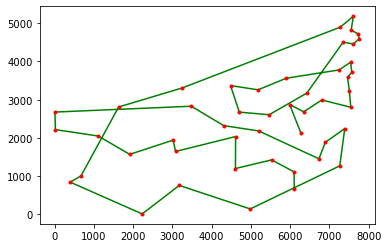

In [8]:
plt.plot(best_seq_hc[:,0], best_seq_hc[:,1], 'g')
plt.plot(xy[:,0], xy[:,1], '.r')
print(best_seq_hc)

In [9]:
def tell_route_seq(answer):
    print("One of the decent routes starts from", answer[0])
    for i in range(1,len(answer)-1):
        print("followed by, ", answer[i])
    print("until the last destination, which is", answer[len(answer)-1])

In [10]:
best_seq = best_seq_hc
tell_route_seq(best_seq)

One of the decent routes starts from [6107.  669.]
followed by,  [6101. 1110.]
followed by,  [5530. 1424.]
followed by,  [4608. 1198.]
followed by,  [4612. 2035.]
followed by,  [3082. 1644.]
followed by,  [3023. 1942.]
followed by,  [1916. 1569.]
followed by,  [1112. 2049.]
followed by,  [  23. 2216.]
followed by,  [  10. 2676.]
followed by,  [3484. 2829.]
followed by,  [4307. 2322.]
followed by,  [5199. 2182.]
followed by,  [6734. 1453.]
followed by,  [6898. 1885.]
followed by,  [7392. 2244.]
followed by,  [7265. 1268.]
followed by,  [4985.  140.]
followed by,  [3177.  756.]
followed by,  [2233.   10.]
followed by,  [401. 841.]
followed by,  [ 675. 1006.]
followed by,  [1633. 2809.]
followed by,  [3245. 3305.]
followed by,  [7280. 4899.]
followed by,  [7611. 5184.]
followed by,  [7555. 4819.]
followed by,  [7732. 4723.]
followed by,  [7762. 4595.]
followed by,  [7608. 4458.]
followed by,  [7352. 4506.]
followed by,  [6426. 3173.]
followed by,  [5468. 2606.]
followed by,  [4706. 2674.]